# Unsupervised approach for data health factors that determine the overall development of the country.

### 2. Import require libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Load the data using pandas library function read_csv

In [ ]:
df = pd.read_csv("Country-data.csv")
df_1 = pd.read_csv("data-dictionary.csv")

### 3. Check  the data

In [ ]:
df.isnull().sum()



country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df_1.isnull().sum()

Column Name    0
Description    0
dtype: int64

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df_1.describe()

,Column Name,Description
count,10,10
unique,10,10
top,country,Name of the country
freq,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_1.duplicated().sum()

0

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
df_1.columns

Index(['Column Name', 'Description'], dtype='object')

In [ ]:
print('country:', len(df['country'].unique()))
print('Child_death:', len(df['child_mort'].unique()))
print('Exports:', len(df['exports'].unique()))
print('Health:', len(df['health'].unique()))
print('Imports:', len(df['imports'].unique()))
print('Income:', len(df['income'].unique()))
print('Inflation:', len(df['inflation'].unique()))
print('Life_expectancy:', len(df['life_expec'].unique()))
print('Fertility:', len(df['total_fer'].unique()))
print('GDP:', len(df['gdpp'].unique()))

country: 167
Child_death: 139
Exports: 147
Health: 147
Imports: 151
Income: 156
Inflation: 156
Life_expectancy: 127
Fertility: 138
GDP: 157


### 4.Data Pre-processing

In [ ]:
df.rename(columns = {'child_mort':'Child_death', 'exports':'Exports','health':'Health','imports':'Imports','income':'Income','inflation':'Inflation','life_expec':'Life_expectancy','total_fer':'Fertility','gdpp':'GDP'}, inplace = True)

In [ ]:
del df["country"]

### 5. EDA

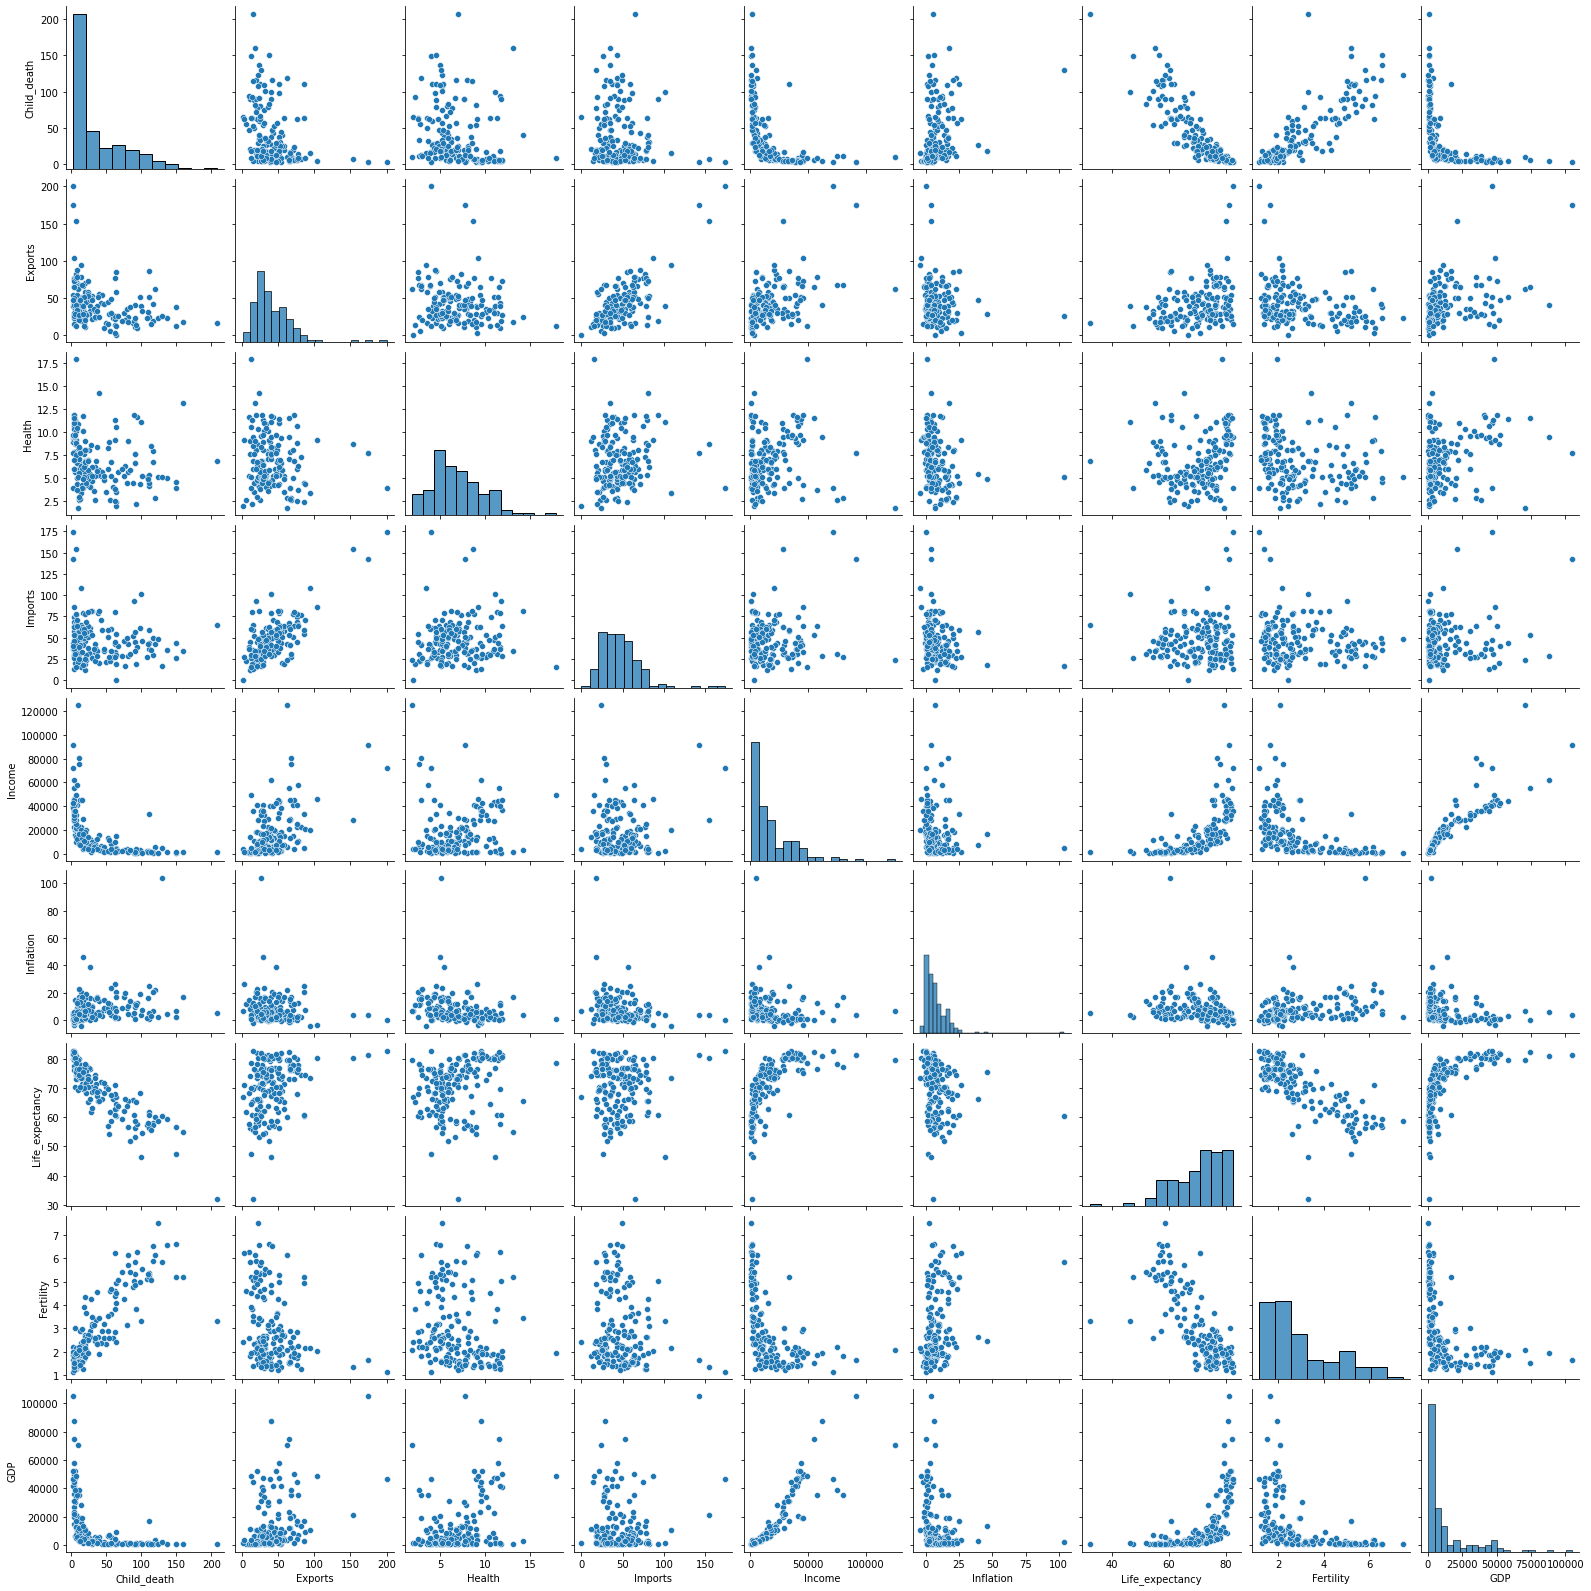

In [ ]:
sns.pairplot(df)

In [ ]:
scale = StandardScaler()
scaled = scale.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(scaled,columns=df.columns)
df_scaled.head()

,Child_death,Exports,Health,Imports,Income,Inflation,Life_expectancy,Fertility,GDP
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### 6.  Model selection and implimentation 

In [ ]:
from sklearn.cluster import KMeans

Elbow method

Text(0.5, 1.0, 'Elbow')

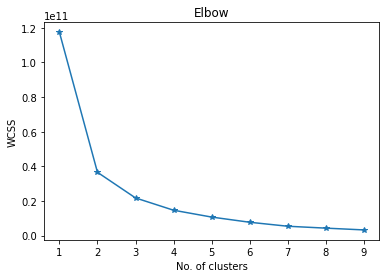

In [ ]:
a = []
x = range(1,10)
for i in x:
    k = KMeans(n_clusters=i)
    k.fit(df)
    a.append(k.inertia_)
    
plt.plot(x,a,marker='*')
plt.ylabel('WCSS')
plt.xlabel('No. of clusters')
plt.title('Elbow')

### 7. Model training

In [ ]:
k= KMeans(n_clusters = 2)
k.fit(df_scaled)

KMeans(n_clusters=2)

In [ ]:
pd.Series(k.labels_).value_counts()

1    99
0    68
dtype: int64

### 8. Model evalaution

In [ ]:
from sklearn import metrics

metrics.silhouette_score(df_scaled,k.labels_)

0.28735668921406704

In [ ]:
cluster_labels = k.fit_predict(df_scaled)

In [ ]:
pred = k.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['Clusters'] = pred
kmeans_df.head(10)

,Child_death,Exports,Health,Imports,Income,Inflation,Life_expectancy,Fertility,GDP,Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k )
    km.fit(df[['GDP','Child_death']])
    sse.append(km.inertia_)

# Linear Regression for salary prediction

In [ ]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.csv')

In [ ]:
# This displays the top 5 rows of the data
data.head()

In [ ]:
# Provides some information regarding the columns in the data
data.info()

In [ ]:
# this describes the basic stat behind the dataset used 
data.describe()

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [ ]:
# Cooking the data
X = data['YearsExperience']
X.head()

In [ ]:
# Cooking the data
y = data['Salary']
y.head()

In [ ]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [ ]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [ ]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('mean squared error :',mse)
print('r square :',rsq)

In [ ]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [ ]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

# Muchroom data for classification

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics  

In [ ]:
df=pd.read_csv('mushrooms.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df2= df.apply(lambda x: pd.factorize(x)[0])

In [ ]:
df2.info()

In [ ]:
X= df2.values[:, 1:23]
Y= df2.values[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [ ]:
clf1 = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=7, min_samples_leaf=5)

In [ ]:
clf1.fit(X_train,y_train)

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)*100

In [ ]:
print(classification_report(y_test, y_pred))